__Data Cleansing and Initial Analysis__

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.style.use('ggplot')
sns.set_style()

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', sep=',')

In [3]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
print('Rows     :', data.shape[0])
print('Columns  :', data.shape[1])
print('\nFeatures :', data.columns.tolist())
print('\nUnique values :\n', data.nunique())


Rows     : 7043
Columns  : 21

Features : ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values :
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


First we're looking for possible issues when we load the data set as type convertion and missing values. Our first task here is motivated by data cleansing and type convertions to be used in future trainnig set.

# Missing Values

In [5]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valores em falta', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values = missing_values_table(data)    
    

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

There are some features that contains __Python object__, and we have to convert this columns to a valid type format. One feature that contains an important information is *_TotalCharges_* which contains charges values and we need to convert to numeric type.

In [7]:
#Data Manipulation

#Replacing spaces with null values in total charges column
data['TotalCharges'] = data["TotalCharges"].replace(" ", np.nan)

#Dropping null values from total charges column which contain .15% missing data 
data = data[data["TotalCharges"].notnull()]
data = data.reset_index()[data.columns]

#convert to float type
data["TotalCharges"] = data["TotalCharges"].astype(float)

With a little cleanising we dropped some values from dataset. These dropped data contains white spaces and we have to change to NaN values. After we dropped this customers from our dataset.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

Again, there are some features that contains ambiguous informations, for example, OnlineSecurity contains 3 differents labels, but the correct labels are YES or NO.

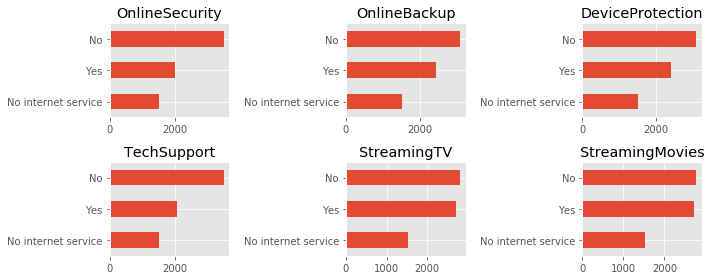

In [9]:
f, axes = plt.subplots(2, 3, sharey=False, sharex=False, figsize=(10,4))

data['OnlineSecurity'].value_counts(ascending=True).plot.barh(title='OnlineSecurity', ax=axes[0,0])
data['OnlineBackup'].value_counts(ascending=True).plot.barh(title='OnlineBackup', ax=axes[0,1])
data['DeviceProtection'].value_counts(ascending=True).plot.barh(title='DeviceProtection', ax=axes[0,2])
data['TechSupport'].value_counts(ascending=True).plot.barh(title='TechSupport', ax=axes[1,0])
data['StreamingTV'].value_counts(ascending=True).plot.barh(title='StreamingTV', ax=axes[1,1])
data['StreamingMovies'].value_counts(ascending=True).plot.barh(title='StreamingMovies', ax=axes[1,2])
plt.tight_layout()

We have to replace __No internet service__ to __No__ and the above features _*OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies_*.

In [10]:
replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'MultipleLines']

for i in replace_cols :
    data[i]  = data[i].replace({'No internet service' : 'No'})
    data[i]  = data[i].replace({'No phone service' : 'No'})

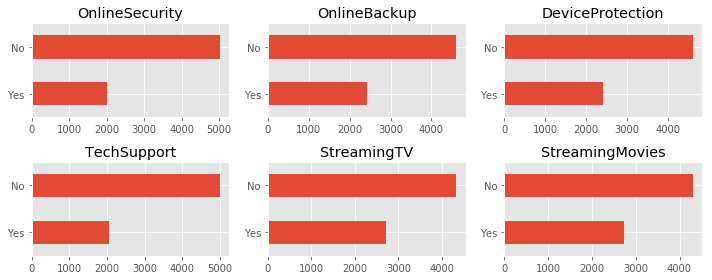

In [11]:
f, axes = plt.subplots(2, 3, sharey=False, sharex=False, figsize=(10,4))

data['OnlineSecurity'].value_counts(ascending=True).plot.barh(title='OnlineSecurity', ax=axes[0,0])
data['OnlineBackup'].value_counts(ascending=True).plot.barh(title='OnlineBackup', ax=axes[0,1])
data['DeviceProtection'].value_counts(ascending=True).plot.barh(title='DeviceProtection', ax=axes[0,2])
data['TechSupport'].value_counts(ascending=True).plot.barh(title='TechSupport', ax=axes[1,0])
data['StreamingTV'].value_counts(ascending=True).plot.barh(title='StreamingTV', ax=axes[1,1])
data['StreamingMovies'].value_counts(ascending=True).plot.barh(title='StreamingMovies', ax=axes[1,2])
plt.tight_layout()


The most of customers doesn't have additional products, choosing simple plans that doesn't contains special products.

We will replace the labels in SeniorCitizen changing __1__ to Yes and __0__ to No. This gives us a better understand about next data visualizations.

In [12]:
#replace values
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})

We can look for the number of contracts that are distributed by customers, trying to summarize how them chose the services:

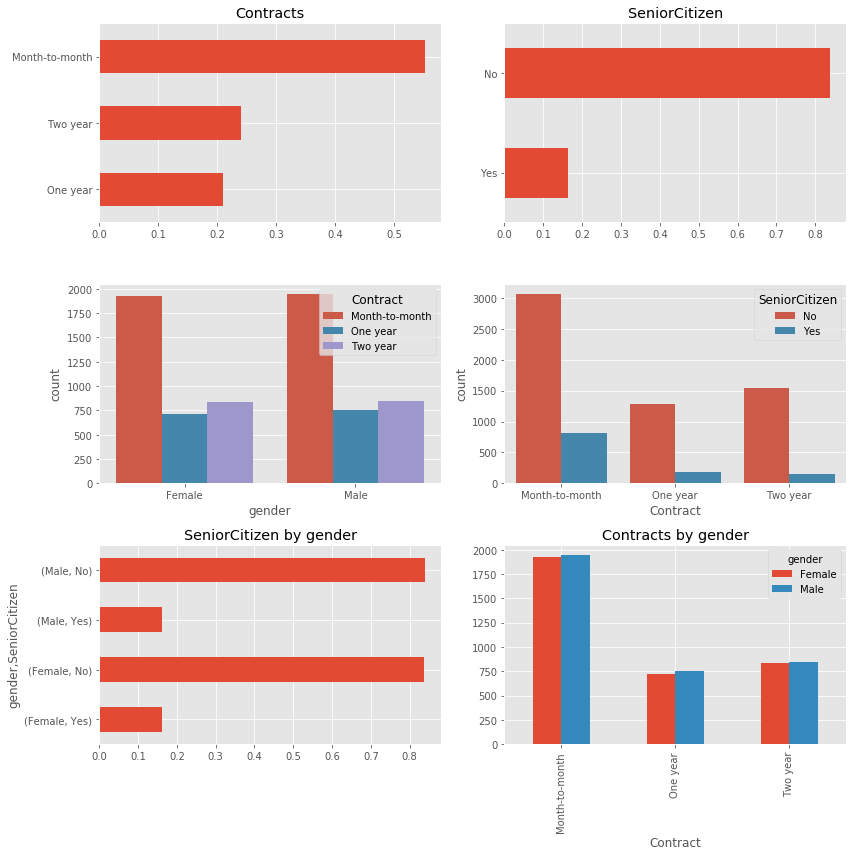

In [13]:
f, axes = plt.subplots(3, 2, sharey=False, sharex=False, figsize=(12,12))

data['Contract'].value_counts(ascending=True, normalize=True).plot.barh(title='Contracts', ax=axes[0,0])
data['SeniorCitizen'].value_counts(ascending=True, normalize=True).plot.barh(title='SeniorCitizen', ax=axes[0,1])
sns.countplot(x='gender', hue='Contract', data=data, orient='v', ax=axes[1,0])
sns.countplot(x='Contract', hue='SeniorCitizen', data=data, orient='v', ax=axes[1,1])

data.groupby('gender')['SeniorCitizen'].value_counts(ascending=True, normalize=True).plot.barh(title='SeniorCitizen by gender', ax=axes[2,0])
data.groupby('Contract')['gender'].value_counts(ascending=True, normalize=False).unstack().plot.bar(title='Contracts by gender', ax=axes[2,1])
plt.tight_layout()

In [14]:
data['Contract'].value_counts(ascending=True, normalize=True)

One year          0.209329
Two year          0.239619
Month-to-month    0.551052
Name: Contract, dtype: float64

In the chart above we were looking for how distributed our contracts are divided by gender, by senior citizen, and by kind of contracts. The most of contracts are specified as __Month-to-month__ about 55% of contracts. About the SeniorCitizen we have just 15% of seniors citizen. When we look for SeniorCitizen by gender we have about the same percentage of male and female who contracts services.

Now we have to look about how the tenure feature are categorized. If we have the entire information about how customers buy products we can analyse the most important features to calculate churn.

The feature tenure specifies the number of months the customer has stayed with the company, we can categorize this in years.

In [15]:
#Tenure to categorical column
def tenure_lab(data):    
    if data['tenure'] <= 12 :
        return "Tenure_0-12"
    elif (data['tenure'] > 12) & (data['tenure'] <= 24 ):
        return "Tenure_12-24"
    elif (data['tenure'] > 24) & (data['tenure'] <= 48) :
        return "Tenure_24-48"
    elif (data['tenure'] > 48) & (data['tenure'] <= 60) :
        return "Tenure_48-60"
    elif data['tenure'] > 60 :
        return "Tenure_60-gt"
data["tenure_group"] = data.apply(lambda data:tenure_lab(data), axis = 1)

We have to plot an histogram for the tenure variable, which represent the number of months the customer has stayed with the company. Beside, we look for the same behaviour but now looking for years.

AttributeError: Unknown property density

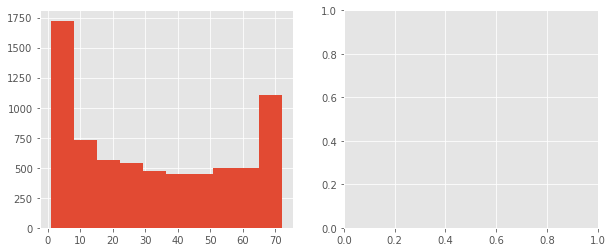

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10,4))

data['tenure'].hist(density=False, ax=ax1)
data['tenure_group'].value_counts(ascending=False, sort=True, normalize=True).sort_index().plot.bar(ax=ax2)

ax1.set_xlabel(r'Tenure')
ax1.set_ylabel(r'# months with the company')
plt.tight_layout()

In [19]:
order_tenure = list(data['tenure_group'].value_counts(ascending=False, sort=True, normalize=True).sort_index().index)

About 31% of customers stay with the company about one year, this period is the most common. Only 20% are greater than or equal to four years, in other words, only 20% continues in the company before four years of contract.

Once we know our customer, we have to identify customers who are churn or non-churn

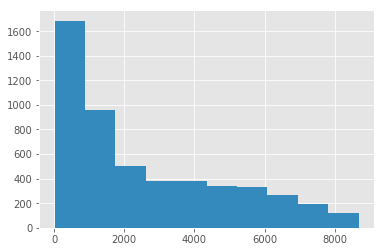

In [20]:
data[data['Churn']=='Yes']['TotalCharges'].hist();
data[data['Churn']=='No']['TotalCharges'].hist();

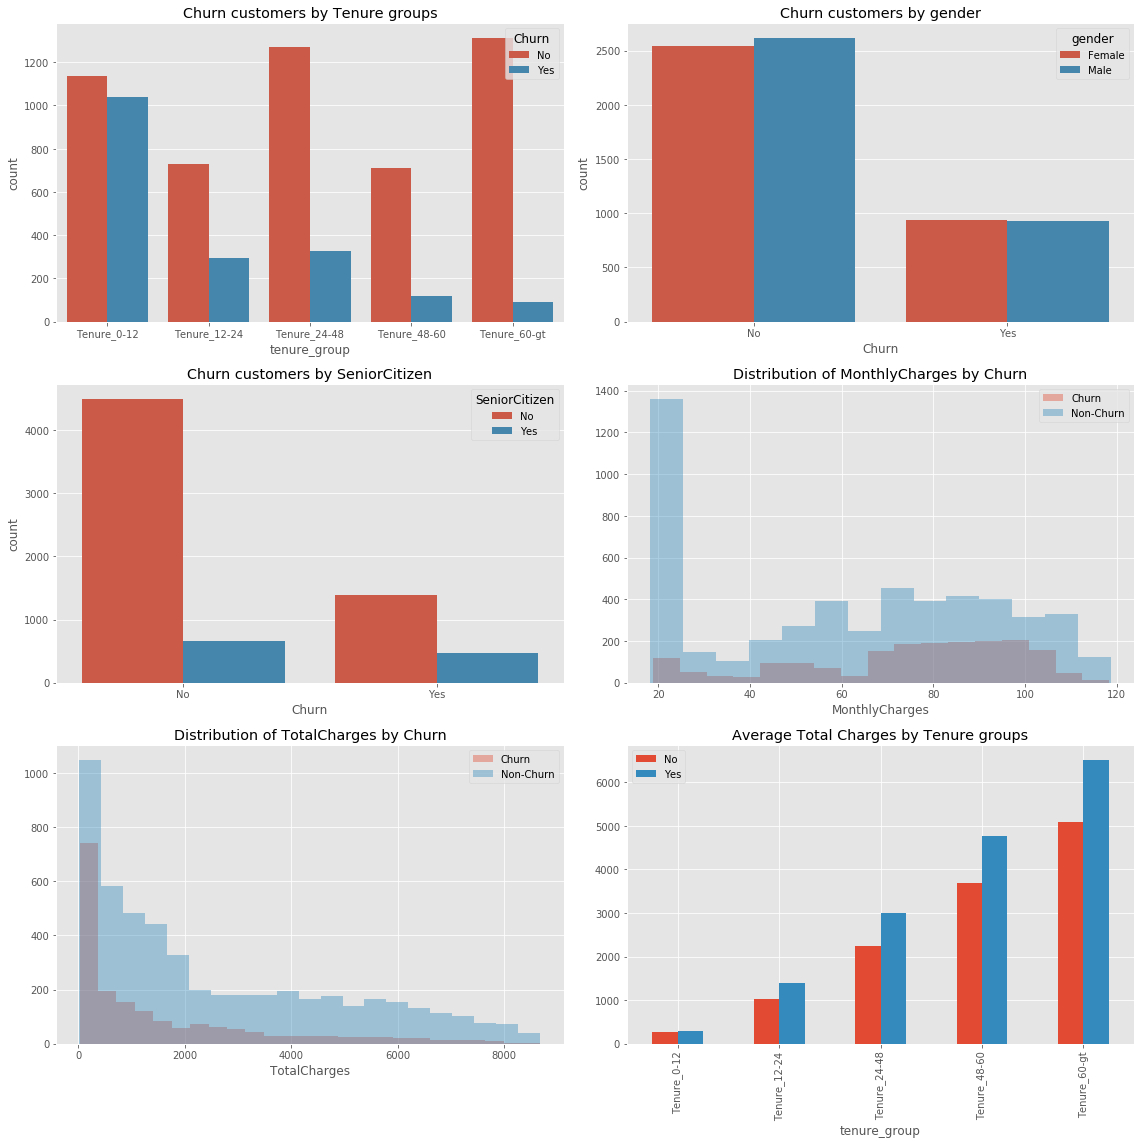

In [21]:
f, axes = plt.subplots(3, 2, sharey=False, sharex=False, figsize=(16,16))

sns.countplot(x='tenure_group', hue='Churn', data=data, order=order_tenure, orient='v', ax=axes[0,0])
sns.countplot(x='Churn', hue='gender', data=data, orient='v', ax=axes[0,1])
sns.countplot(x='Churn', hue='SeniorCitizen', data=data, orient='v', ax=axes[1,0])
sns.distplot(data[data['Churn']=='Yes']['MonthlyCharges'], kde=False, hist=True, norm_hist=False, ax=axes[1,1], label='Churn')
sns.distplot(data[data['Churn']=='No']['MonthlyCharges'], kde=False, hist=True, norm_hist=False, ax=axes[1,1], label='Non-Churn')

sns.distplot(data[data['Churn']=='Yes']['TotalCharges'], kde=False, hist=True, norm_hist=False, ax=axes[2,0], label='Churn')
sns.distplot(data[data['Churn']=='No']['TotalCharges'], kde=False, hist=True, norm_hist=False, ax=axes[2,0], label='Non-Churn')

pivot = pd.pivot_table(data, values=['MonthlyCharges', 'TotalCharges'], index=['tenure_group', 'Churn'])

pivot.unstack()['TotalCharges'].plot.bar(ax=axes[2,1], title='Average Total Charges by Tenure groups')


axes[0,0].set_title('Churn customers by Tenure groups')
axes[0,1].set_title('Churn customers by gender')
axes[1,0].set_title('Churn customers by SeniorCitizen')
axes[1,1].set_title('Distribution of MonthlyCharges by Churn')
axes[2,0].set_title('Distribution of TotalCharges by Churn')

axes[1,1].legend()
axes[2,0].legend()
axes[2,1].legend()
plt.tight_layout()

When we plotted _churn_ variable with the features we chose, we observed how customers are categorized, for example, there aren't diferences between gender. Other conclusion is how much older a customer is less churn they are.

To finish, we can visualize how ours variables are correlated. To do that we can calculate the *__Pearson correlation coefficient__*.

Pearson correlation coefficient

In statistics, the Pearson correlation coefficient is a measure of the linear correlation between two variables X and Y. Owing to the Cauchy–Schwarz inequality it has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. Pearson's coefficient is the covariance of the two variables divided by the product of their standard deviations.

Pearson's coefficient when applied to a sample is commonly represented by the letter  r  and can assume values between -1 and 1.

* r=1  Means a positive correlation between two variables, in other words if one vary the second one varies too.
* r=−1  Means a negative correlation between two variables, in other words if one vary the second one varies in the opposite way.
* r=0  Represents a zero correlation, one variable doesn't depend of second one linearly.
rXY=∑ni=1(Xi−X⎯⎯⎯⎯)(Yi−Y⎯⎯⎯⎯)∑ni=1(Xi−X⎯⎯⎯⎯)2‾‾‾‾‾‾‾‾‾‾‾‾‾√∑ni=1(Yi−Y⎯⎯⎯⎯)2‾‾‾‾‾‾‾‾‾‾‾‾‾√

* Next we will do encoding with in our variables to categorical values, this will permite us to create some correlation matrix to analyse how ours variables are relationed.


In [22]:
from sklearn.preprocessing import LabelEncoder
dataobject=data.select_dtypes(['object'])

def uni(columnname):
    print(columnname,"--" ,data[columnname].unique())

for i in range(1,len(dataobject.columns)):
    uni(dataobject.columns[i])
    
def labelencode(columnname):
    data[columnname] = LabelEncoder().fit_transform(data[columnname])
    
for i in range(1,len(dataobject.columns)):
    labelencode(dataobject.columns[i])
        
for i in range(1,len(dataobject.columns)):
     uni(dataobject.columns[i])

gender -- ['Female' 'Male']
SeniorCitizen -- ['No' 'Yes']
Partner -- ['Yes' 'No']
Dependents -- ['No' 'Yes']
PhoneService -- ['No' 'Yes']
MultipleLines -- ['No' 'Yes']
InternetService -- ['DSL' 'Fiber optic' 'No']
OnlineSecurity -- ['No' 'Yes']
OnlineBackup -- ['Yes' 'No']
DeviceProtection -- ['No' 'Yes']
TechSupport -- ['No' 'Yes']
StreamingTV -- ['No' 'Yes']
StreamingMovies -- ['No' 'Yes']
Contract -- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -- ['Yes' 'No']
PaymentMethod -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn -- ['No' 'Yes']
tenure_group -- ['Tenure_0-12' 'Tenure_24-48' 'Tenure_12-24' 'Tenure_60-gt' 'Tenure_48-60']
gender -- [0 1]
SeniorCitizen -- [0 1]
Partner -- [1 0]
Dependents -- [0 1]
PhoneService -- [0 1]
MultipleLines -- [0 1]
InternetService -- [0 1 2]
OnlineSecurity -- [0 1]
OnlineBackup -- [1 0]
DeviceProtection -- [0 1]
TechSupport -- [0 1]
StreamingTV -- [0 1]
StreamingMovies -- [0 1]
Contract -

In [23]:
df = data.copy()
drop_list = ['customerID', 'gender', 'Dependents', 'PhoneService', 'DeviceProtection', 'TechSupport',
             'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

df['Contract_0'] = ((df['Contract']==0).values).astype(int)
df['Contract_1'] = ((df['Contract']==1).values).astype(int)
df['Contract_2'] = ((df['Contract']==2).values).astype(int)

df['tenure_0'] = ((df['tenure_group']==0).values).astype(int)
df['tenure_1'] = ((df['tenure_group']==1).values).astype(int)
df['tenure_2'] = ((df['tenure_group']==2).values).astype(int)
df['tenure_3'] = ((df['tenure_group']==3).values).astype(int)
df['tenure_4'] = ((df['tenure_group']==4).values).astype(int)

df = df.drop(drop_list, axis=1)
df = df.drop(['Contract', 'tenure', 'tenure_group'], axis=1)

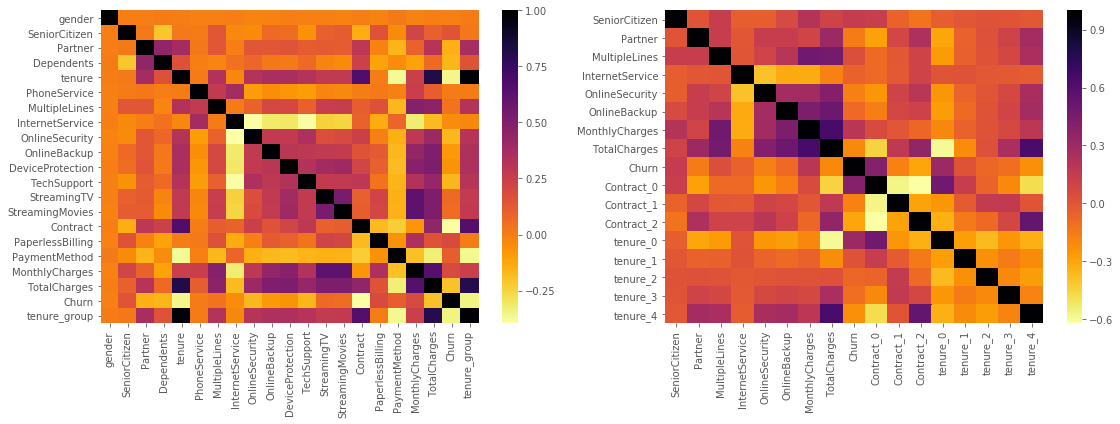

In [24]:
f, (ax1,ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(16,6))

corr = df.corr(method='pearson')

sns.heatmap(data.corr(method='pearson'), cmap=plt.cm.inferno_r, ax=ax1)
sns.heatmap(corr, cmap=plt.cm.inferno_r, ax=ax2)
plt.tight_layout()

Above we plotted the correlation matrix with our features, some of these features doesn't contribute to us to understand the root-cause of churn, so we dropped some and keeped the features that we think it's important to us.

To exemplify, we look for the correlation coefficient between tenure and TotalCharges, it can be a little obvious because the time a customer contracted a service is highly related with the charges that he will pay. The coefficient is __corr['tenure']['TotalCharges']= 0.83__, showing high correlation between this two features.

# Prediction

__1)__ Before we train our model, we pre-processed our data. We done some cleasing, some labels corrections, and after all that, we categorized numerically our data. In some features we had ambiguous informations, for example, in OnlineSecurity we had three differents labels, __YES__, __NO__ and __NO_INTERNET_SERVICE__, but the correct labels are __YES__ or __NO__. So, we correct these kind of informations in other features. After that we categorized the labels __NO__ or __YES__ to 0 or 1. We done this kind of preprocessing all over the dataset.

__2)__ One of the methods to identify the most importants features is try to fit our data in a Linear Regression. In this case I'll use linear regression with penalties to find the variables that are more important to linear regression. Besides that, I'll try Random Forest Algorithm, Logistic Regression and Support Vector Machine to do the same thing, but with differents approachs.

In [25]:
from sklearn.model_selection import train_test_split
data_to_train = data.drop(['customerID'], axis=1).copy()

train_set, validation_set = train_test_split(data_to_train.copy(), test_size=0.30)

#to perform cross-validation
target_to_train = data_to_train['Churn']
data_to_train = data_to_train.drop(['Churn'], axis=1)

#to perform holdout-set
train_target = train_set['Churn']
train_set = train_set.drop(['Churn'], axis=1)

validation_target = validation_set['Churn']
validation_set = validation_set.drop(['Churn'], axis=1)

In [26]:
x, y = train_set, train_target

In [27]:
from sklearn.linear_model import Lasso, LassoCV

lassocv = LassoCV(alphas=None, cv=40, max_iter=100000, normalize=True)
lassocv.fit(data_to_train, target_to_train);

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Fit RandomForest Classifier
clf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
clf.fit(x, y);

In [29]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x, y);

In [30]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=0.01) 
svm.fit(x, y);

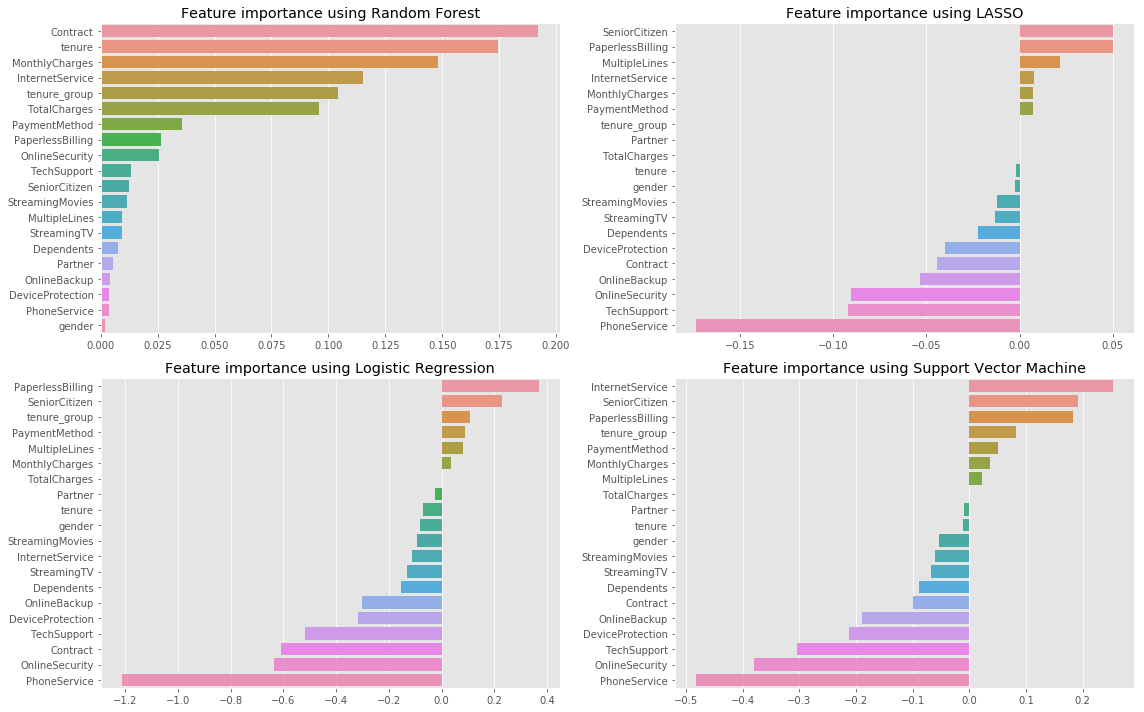

In [31]:
f, axes = plt.subplots(2, 2, sharey=False, sharex=False, figsize=(16,10))

imp1 = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
imp2 = pd.Series(data=lassocv.coef_, index=x.columns).sort_values(ascending=False)
imp3 = pd.Series(data=logreg.coef_[0], index=x.columns).sort_values(ascending=False)
imp4 = pd.Series(data=svm.coef_[0], index=x.columns).sort_values(ascending=False)

sns.barplot(y=imp1.index, x=imp1.values, orient='h', ax=axes[0,0])
sns.barplot(y=imp2.index, x=imp2.values, orient='h', ax=axes[0,1])
sns.barplot(y=imp3.index, x=imp3.values, orient='h', ax=axes[1,0])
sns.barplot(y=imp4.index, x=imp4.values, orient='h', ax=axes[1,1])


axes[0,0].set_title("Feature importance using Random Forest")
axes[0,1].set_title("Feature importance using LASSO")
axes[1,0].set_title("Feature importance using Logistic Regression")
axes[1,1].set_title("Feature importance using Support Vector Machine")

plt.tight_layout();


To understand the chart above, remember that we are looking for how each feature contributes to gives us a good result to our target feature Churn. When we use __LASSO__, __SVM__ and __Logistic Regression__, we can see that some features have a negative relation to our predicted variable Churn, while others have positive relation. Negative relation means that likeliness of churn decreases with that variable.

__To summarize:__

Total charges, internet services and seniority, for example, can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it, probably because you have to pay more, contributing to total charges.

__3)__ We chose three differents algorithms to predict the Churn feature, Random Forest, Logistic Regression and Support Vector Machine. Bellow we'll give some information of why we used them. We are trying to predict a categorical variable which represent a customer is Churn or Non-Churn, then to do that we had to trainned our classifiers with three differents algorithms, bellow we will explain our choice.

__Random Forest__:

Random forests are a powerful method with several advantages and can fit our model very well, we give some advantages and disadvantages bellow:

* Both training and prediction are very fast, because of the simplicity of the underlying decision trees. In addition, both tasks can be straightforwardly parallelized, because the individual trees are entirely independent entities.
* The multiple trees allow for a probabilistic classification.
* The nonparametric model is extremely flexible, and can thus perform well on tasks that are under-fit by other estimators.
* A primary disadvantage of random forests is that the results are not easily interpretable: that is, if you would like to draw conclusions about the meaning of the classification model, random forests may not be the best choice.


__Logistic Regression:__

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary) as in our case to predict __Churn__ or __Non-Churn__. Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

To summarize, logistic regression allow us to predict labels of a target feature, even though the feature depends of several other features, giving us good prediction.

__Support Vector Machine:__

Support vector machines are a powerful classification method for a number of reasons:

* Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.
* Once the model is trained, the prediction phase is very fast.
* Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.
* Their integration with kernel methods makes them very versatile, able to adapt to many types of data.

However, SVMs have several disadvantages as well:

* The scaling with the number of samples  N  is  [N3]  at worst, or  [N2]  for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.
* The results are strongly dependent on a suitable choice for the softening parameter  C . This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.
* The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation, but this extra estimation is costly.

Based on this explanations, we chose this three algorithms to perform about our dataset, every one has advantages and disadvantages also. SVM is a good algorithm but sometimes needs much time to train. Random Forest are very good but sometimes can lead us to overfitting problems. Lastly, Logistic Regression is always a good method to classifications problems combined with Cross Validation can give us best results.

4) Bias and variance dilemma. Here is the most important thing to understand about our results. We've trained our models, chose our hyperparameters but we need a way to validate that our model and our hyperparameters are a good fit to the data. When you trained a model and the model fits very well, with accuracy about 98%, for example, maybe there are some problems with. Maybe your model are suffering of high variance problem, its happens when your model fits your data very well, overfitting your model. But, when you try to predict something that is little different of your train set you got a reasonable error.

On the other hand, when you trained model and the model fits very poorly, with low accuracy, and don't matter how big your train dataset is, you always take low accuracy, probabily you are suffering of underfitting problem. In this case we need to add new features to our train set to improve our accuracy.

Bellow we have a picture that explains itself, relationing the bias and variance dilemma.

them hinh anh minh hoa ----

Our approach to solve this problem consists in two methods holdout sets and cross-validation. Holdout set consists in hold back some subset of the dataset from the training of the model, and then use this holdout set to check the model performance. This was the tecnique that we used here in our models, besides Linear Regression Lasso that we used cross-validation.

One disadvantage of using a holdout set for model validation is that we have lost a portion of our dataset to the model training. Sometimes holdout-set can cause some problems, because we lose a portion of our data to train our model, and when the dataset is small it can lead us to bias or variance problems. One way to address this is to use cross-validation; that is, to do a sequence of fits where each subset of the data is used both as a training set and as a validation set.

We used here holdout set to attempt avoid underfitting and overfitting problems. After we will drop some features in a attempt to improve our scores.

In next cells we see how our models scores and we can understand better how models.


__5__) Bellow we look for how accurate our models are. The main validation technique used here was holdout sets, but to compare with cross-validation, we have calculated the accuracy using cross-validation for comparation.

In [32]:
from sklearn.model_selection import cross_val_score

In [36]:
cross_validation_pred_random_forest = cross_val_score(clf, data_to_train, target_to_train, cv=5)
cross_validation_pred_logreg = cross_val_score(logreg, data_to_train, target_to_train, cv=5)
cross_validation_pred_svm = cross_val_score(svm, data_to_train, target_to_train, cv=5)

Here we predict the labels to __Churn__ feature using our validation set

In [37]:
validation_pred_random_forest = clf.predict(validation_set)
validation_pred_logreg = logreg.predict(validation_set)
validation_pred_svm = svm.predict(validation_set)

Here we can compute the accuracy of each model:


In [38]:
from sklearn.metrics import accuracy_score
acc_random_forest = accuracy_score(validation_target, validation_pred_random_forest)
acc_logreg = accuracy_score(validation_target, validation_pred_logreg)
acc_svm = accuracy_score(validation_target, validation_pred_svm)

print('Random Forest Accuracy:          ', acc_random_forest*100)
print('Logistic Regression Accuracy:    ', acc_logreg*100)
print('SVM Accuracy:                    ', acc_svm*100)

print('\nRandom Forest CV Accuracy:       ', cross_validation_pred_random_forest.mean()*100)
print('Logistic Regression CV Accuracy: ', cross_validation_pred_logreg.mean()*100)
print('SVM CV Accuracy:                 ', cross_validation_pred_svm.mean()*100)

Random Forest Accuracy:           78.53080568720378
Logistic Regression Accuracy:     79.478672985782
SVM Accuracy:                     78.48341232227489

Random Forest CV Accuracy:        79.94875845785374
Logistic Regression CV Accuracy:  80.27597848380431
SVM CV Accuracy:                  78.86795015932063


The most accurated model was Logistic Regression with about 80% of accuracy when we use *__holdout sets__* (probably it's can run different in others machine, because I don't set a static). To improve this accuracy we can do some __feature engineering__, dropping some features and create others to improve model

To visualize, we can plot the confusion matrix to models.

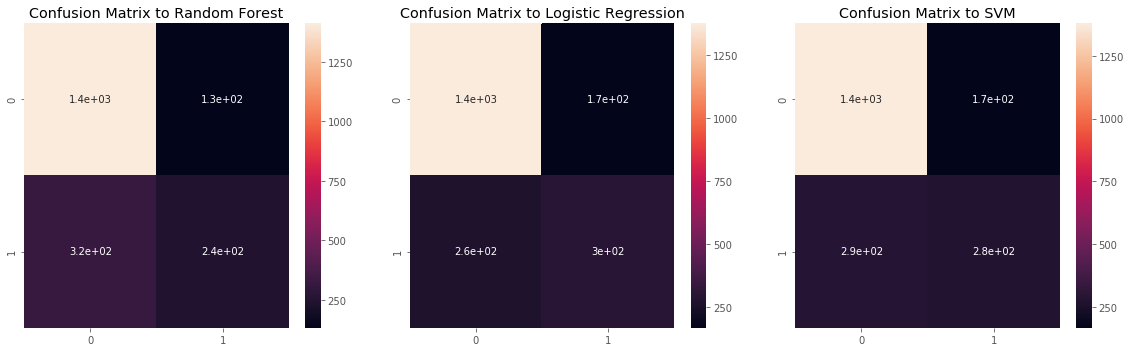

In [39]:
from sklearn.metrics import confusion_matrix

f, axes = plt.subplots(1, 3, sharey = False, sharex=False, figsize = (16,5))

axes[0].set_title("Confusion Matrix to Random Forest")
axes[1].set_title("Confusion Matrix to Logistic Regression")
axes[2].set_title("Confusion Matrix to SVM")

confusion_matrix1 = confusion_matrix(validation_target, validation_pred_random_forest)
confusion_matrix2 = confusion_matrix(validation_target, validation_pred_logreg)
confusion_matrix3 = confusion_matrix(validation_target, validation_pred_svm)

sns.heatmap(confusion_matrix1, ax=axes[0], annot=True)
sns.heatmap(confusion_matrix2, ax=axes[1], annot=True)
sns.heatmap(confusion_matrix3, ax=axes[2], annot=True)

plt.tight_layout();

To improve our accuracy lets do some feature engineering and drop some features and create other important ones.

__We done a previous dataframe with our required features, df__. This dataset can give us a better score in our models because we dropped some features and rearrange others

In [40]:
df.head()

,SeniorCitizen,Partner,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,MonthlyCharges,TotalCharges,Churn,Contract_0,Contract_1,Contract_2,tenure_0,tenure_1,tenure_2,tenure_3,tenure_4
0,0,1,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0
1,0,0,0,0,1,0,56.95,1889.50,0,0,1,0,0,0,1,0,0
2,0,0,0,0,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0
3,0,0,0,0,1,0,42.30,1840.75,0,0,1,0,0,0,1,0,0
4,0,0,0,1,0,0,70.70,151.65,1,1,0,0,1,0,0,0,0


In [41]:
train_set, validation_set = train_test_split(df.copy(), test_size=0.3)

#to perform holdout-set 

train_target = train_set['Churn']
train_set = train_set.drop(['Churn'], axis=1)

validation_target = validation_set['Churn']
validation_set = validation_set.drop(['Churn'], axis=1)

x, y = train_set, train_target

In [42]:
clf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
clf.fit(x, y);

logreg = LogisticRegression()
logreg.fit(x, y);

svm = SVC(kernel='linear') 
svm.fit(x, y);

validation_pred_random_forest = clf.predict(validation_set)
validation_pred_logreg = logreg.predict(validation_set)
validation_pred_svm = svm.predict(validation_set)

acc_random_forest = accuracy_score(validation_target, validation_pred_random_forest)
acc_logreg = accuracy_score(validation_target, validation_pred_logreg)
acc_svm = accuracy_score(validation_target, validation_pred_svm)

In [43]:
print('Random Forest Accuracy: ', acc_random_forest*100)
print('Logistic Regression Accuracy: ', acc_logreg*100)
print('SVM Accuracy: ', acc_svm*100)

Random Forest Accuracy:  79.62085308056872
Logistic Regression Accuracy:  78.86255924170617
SVM Accuracy:  78.90995260663507


Our score decrease to 2%, we are suffering of underfitting in this case and we have to add more features. A probably feature that we want to have is a score given by the customer. This feature can give us a better accuracy to our models.

__6)__ To build a scalable machine learning model we have to identify our objective to build a application to our client. In our analysis we trained a model that predicts if the customer will be a churn or non-churn customer, so we trained a static model. In the figures below we exemplify a production-chain to create machine-learning applications: